# 추천시스템
: 사용자의 취향파악
 - 컨텐츠 기반
 - 협업 기반 -> 메모리기반(KNN) / 잠재요인(latent factor)
 
 KNN -> 사용자기반 / 아이템기반
 

In [10]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [123]:
critics={
    'BTS':{'암수살인':5, '바울':4, '할로윈':1.5},
    '손흥민':{'바울':5, '할로윈':2},
    '레드벨벳':{'암수살인':2.5, '바울':2, '할로윈':1},
    '트와이스':{'암수살인':3.5, '바울':4, '할로윈':5}
}

In [27]:
critics['BTS']
# critics['super']  # key error

print(critics.get('super'))  # None

critics.get('BTS').get('바울')

None


4

In [29]:
from math import sqrt

In [36]:
# sqrt(pow(3,2) + pow(1,2))

def sim(i,j):  # i : x좌표 거리, j : y좌표 거리
    return sqrt(pow(i,2) + pow(j,2))

In [45]:
v1 = critics['손흥민']['바울'] - critics['레드벨벳']['바울']
v2 = critics['손흥민']['할로윈'] - critics['레드벨벳']['할로윈']
print(sim(v1,v2))

3.1622776601683795


In [56]:
for i in critics:
    if i != '손흥민':
        d1 = critics.get('손흥민').get('바울') - critics.get(i).get('바울')
        d2 = critics.get('손흥민').get('할로윈') - critics.get(i).get('할로윈')
        
        print(i,'와의 거리 : ',sim(d1,d2))

BTS 와의 거리 :  1.118033988749895
레드벨벳 와의 거리 :  3.1622776601683795
트와이스 와의 거리 :  3.1622776601683795


In [60]:
for i in critics:
    if i != '손흥민':
        d1 = critics.get('손흥민').get('바울') - critics.get(i).get('바울')
        d2 = critics.get('손흥민').get('할로윈') - critics.get(i).get('할로윈')
        
        # print(i,'와의 거리 : ',sim(d1,d2))
        # 0 ~ 유사도 ~ 1
        
        print(i,'와의 유사도 : ',1/(sim(d1,d2) + 1))

BTS 와의 유사도 :  0.4721359549995794
레드벨벳 와의 유사도 :  0.2402530733520421
트와이스 와의 유사도 :  0.2402530733520421


In [86]:
# 유클리디안 거리 : 다차원 공간에서 두 점 사이의 거리
def sim_distance(data, name1, name2):
    # 구현부분
    dis = 0
    for i in data[name1] : # {'암수살인': 5, '바울': 4, '할로윈': 1.5}
        if i in data[name2]:
            dis += pow(data[name1].get(i) - data[name2].get(i),2)
            
    data[name2] # {'암수살인': 3.5, '바울': 4, '할로윈': 5}
    
    # 유사도로 변환해서 출력
    return 1/(sqrt(dis)+1)
    
print(sim_distance(critics, 'BTS', '트와이스'))
print(sim_distance(critics, 'BTS', '레드벨벳'))
print(sim_distance(critics, 'BTS', '손흥민'))

0.20799159651347807
0.23582845781094
0.4721359549995794


In [97]:
# 데이터, 기준관객, 등수, 유사도함수 : sim_distance함수를 simf라는이름으로 사용하겠다.
def top_match(data, name, rank=2, simf = sim_distance):
    
    for i in data[name]:
        for j in data:
            if (j != name) & (i in data[j]):
                print(j,i,data[j][i])
        
    return

# critics에서 BTS와 공통으로 본 영화 중에서 가장 유사하게 평점을 준 관객 2명을 출력
top_match(critics,'BTS')

레드벨벳 택시운전사 2.5
블랙핑크 택시운전사 3.0
소녀시대 택시운전사 2.5
오마이걸 택시운전사 3.0
모모랜드 택시운전사 3.0
레드벨벳 겨울왕국 3.5
블랙핑크 겨울왕국 3.5
소녀시대 겨울왕국 3.0
마마무 겨울왕국 3.5
오마이걸 겨울왕국 4.0
모모랜드 겨울왕국 4.0
우주소녀 겨울왕국 4.5
레드벨벳 리빙라스베가스 3.0
블랙핑크 리빙라스베가스 1.5
마마무 리빙라스베가스 3.0
오마이걸 리빙라스베가스 2.0
레드벨벳 넘버3 3.5
블랙핑크 넘버3 5.0
소녀시대 넘버3 3.5
마마무 넘버3 4.0
오마이걸 넘버3 3.0
모모랜드 넘버3 5.0
우주소녀 넘버3 4.0
레드벨벳 사랑과전쟁 2.5
블랙핑크 사랑과전쟁 3.5
마마무 사랑과전쟁 2.5
오마이걸 사랑과전쟁 2.0
모모랜드 사랑과전쟁 3.5
우주소녀 사랑과전쟁 1.0
레드벨벳 세계대전 3.0
블랙핑크 세계대전 3.0
소녀시대 세계대전 4.0
마마무 세계대전 4.5
오마이걸 세계대전 3.5
모모랜드 세계대전 3.0


In [124]:
# 데이터, 기준관객, 등수, 유사도함수 : sim_distance함수를 simf라는이름으로 사용하겠다.
def top_match(data, name, rank=2, simf = sim_distance):
    
    simList = []
    
    for i in data:
        if i != name:
            simList.append((simf(data, name, i), i ))
    simList.sort()    # 오름차순정렬
    simList.reverse() # 내림차순으로 변경
    
    return simList[:rank]

# critics에서 BTS와 공통으로 본 영화 중에서 가장 유사하게 평점을 준 관객 2명을 출력
print(top_match(critics,'BTS'))

[(0.4721359549995794, '손흥민'), (0.23582845781094, '레드벨벳')]


In [143]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [144]:
def myBar(data, lab):
    # 시각화
    pos = range(len(data))
    plt.barh(pos, data, height=0.5, color='b')  # 가로
    plt.yticks(pos,lab)
    plt.show()

[0.4721359549995794, 0.23582845781094, 0.20799159651347807]
['손흥민', '레드벨벳', '트와이스']


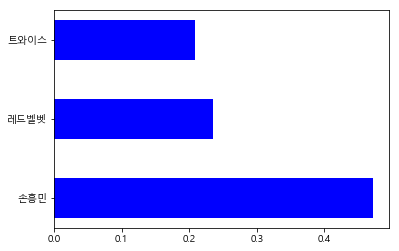

In [145]:
# 튜플 분리
li = top_match(critics,'BTS',3)
scoreList = []
nameList = []

for i in li :
    scoreList.append(i[0])
    nameList.append(i[1])
    
print(scoreList)
print(nameList)

myBar(scoreList,nameList)

In [146]:
critics = {
    '레드벨벳': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '블랙핑크': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '사랑과전쟁': 3.5,
    },
    '소녀시대': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '마마무': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '오마이걸': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '모모랜드': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '우주소녀': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0},
}

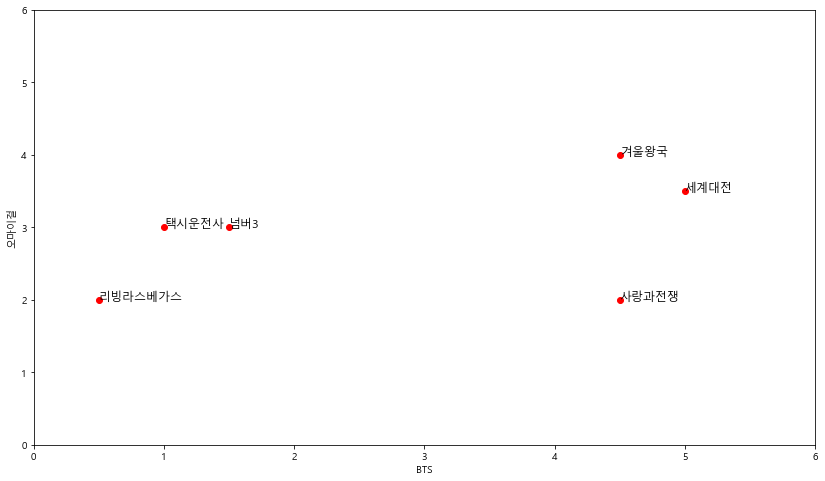

In [159]:
def scoreGraph(data, n1, n2):
    # 스캐터플롯 출력
    plt.figure(figsize=(14,8))
    li1 = []
    li2 = []
    for i in data[n1]:
        if i in data[n2]:
            li1.append(data[n1][i])
            li2.append(data[n2][i])
            plt.text(data[n1][i], data[n2][i], i, fontsize=12)
            
    plt.plot(li1, li2, 'ro')
    plt.xlabel(n1)
    plt.ylabel(n2)
    plt.axis([0,6,0,6])
    plt.show()
    
scoreGraph(critics, 'BTS','오마이걸')


In [223]:
pd.DataFrame(critics)

,레드벨벳,BTS,블랙핑크,소녀시대,마마무,오마이걸,모모랜드,우주소녀
택시운전사,2.5,1.0,3.0,2.5,NaN,3.0,3.0,NaN
겨울왕국,3.5,4.5,3.5,3.0,3.5,4.0,4.0,4.5
리빙라스베가스,3.0,0.5,1.5,NaN,3.0,2.0,NaN,NaN
넘버3,3.5,1.5,5.0,3.5,4.0,3.0,5.0,4.0
사랑과전쟁,2.5,4.5,3.5,NaN,2.5,2.0,3.5,1.0
세계대전,3.0,5.0,3.0,4.0,4.5,3.5,3.0,NaN


In [162]:
def sim_pearson(data, n1, n2):
    # 구현
    sumX = 0
    sumY = 0
    sumSqX = 0
    sumSqY = 0
    sumXY = 0
    cnt = 0
    
    for i in data[n1]:  # n1이 본 영화 이름
        if i in data[n2]:  # 그 영화를 n2가 봤으면
            sumX += data[n1][i]
            sumY += data[n2][i]
            sumSqX += pow(data[n1][i], 2)
            sumSqY += pow(data[n2][i], 2)
            sumXY += (data[n1][i] *  data[n2][i])
            cnt += 1
            
    return (sumXY-((sumX*sumY)/cnt)) / sqrt((sumSqX-((pow(sumX,2))/cnt))*(sumSqY-((pow(sumY,2))/cnt)))

sim_pearson(critics,'BTS','오마이걸')

0.41791069697885247

In [166]:
# 전체 관객들에 대한 상관계수

def top_match(data, name, rank=3, simp = sim_pearson):
    
    simList = []
    
    for i in data:
        if i != name:
            simList.append((simp(data, name, i), i ))
            
    simList.sort()    # 오름차순정렬
    simList.reverse() # 내림차순으로 변경
    
    return simList[:rank]

# critics에서 BTS와 공통으로 본 영화 중에서 상관계수가 가장 높은 5명을 추출
print(top_match(critics,'BTS',5))

[(0.5692099788303083, '소녀시대'), (0.41791069697885247, '오마이걸'), (0.21693045781865616, '블랙핑크'), (0.15430334996209194, '마마무'), (0.05477225575051661, '레드벨벳')]


In [ ]:
# 유사도 값에 대한 기준치를 충족하는 사람에 한해 예상평점 / 추천영화를 구하는데 사용
'''
1) 평점 추측 : 유사도 * 상대방의 영화평점
ex - 소녀시대가 3점 부여, BTS와 소녀시대가 90% 유사도 =? 3*0.9 -> 2.7점 줄 것으로 예측
-> 모든 관객에 대해 평점 추측 -> 총합

2) 추측평점 총합 / 유사도 총합 => 모든 사람을 고려했을 때 예상되는 평점

3) 예상되는 평점을 기준으로 아직 안 본 영화를 추천
'''

In [188]:
def recommendation(data, person, sinf=sim_pearson):
    res = top_match(data, person, len(data))
    # print(res)
    
    simSum = 0
    score_dict = {}  # 예상평점의 총합을 저장하기위한 dict
    sim_dict = {}    # 유사도의 총합을 저장하기 위한 dict
    
    myList = []
    
    for sim, name in res:
        if sim < 0 : continue
        for movie in data[name]:
            if movie not in data[person]:
                simSum += sim * data[name][movie]
                score_dict.setdefault(movie, 0 )
                score_dict[movie] += simSum
                
                sim_dict.setdefault(movie, 0 )
                sim_dict[movie] += sim
            simSum = 0
    
    for key in score_dict:
        score_dict[key] = score_dict[key] / sim_dict[key]
        myList.append((score_dict[key], key))
    myList.sort()
    myList.reverse()
    
    print(myList)
    return

recommendation(critics,'소녀시대')
# 소녀시대가 안 본 영화중에서 예상 평점이 가장 높은 영화 3편 출력

[(3.0761574975571793, '사랑과전쟁'), (2.1938491995536373, '리빙라스베가스')]


In [167]:
pd.DataFrame(critics)

,레드벨벳,BTS,블랙핑크,소녀시대,마마무,오마이걸,모모랜드,우주소녀
택시운전사,2.5,1.0,3.0,2.5,NaN,3.0,3.0,NaN
겨울왕국,3.5,4.5,3.5,3.0,3.5,4.0,4.0,4.5
리빙라스베가스,3.0,0.5,1.5,NaN,3.0,2.0,NaN,NaN
넘버3,3.5,1.5,5.0,3.5,4.0,3.0,5.0,4.0
사랑과전쟁,2.5,4.5,3.5,NaN,2.5,2.0,3.5,1.0
세계대전,3.0,5.0,3.0,4.0,4.5,3.5,3.0,NaN


In [206]:
# setdefault 연습
x = {'a':10, 'b':20}
x.setdefault('c')
print(x, end='\n\n')

x.setdefault('d',30)
print(x, end='\n\n')

x.update(a=50)
print(x, end='\n\n')

x.setdefault('a',100)  # 키가 이미 있으면 X
print(x, end='\n\n')

x['a'] += 5
print(x, end='\n\n')

{'a': 10, 'b': 20, 'c': None}

{'a': 10, 'b': 20, 'c': None, 'd': 30}

{'a': 50, 'b': 20, 'c': None, 'd': 30}

{'a': 50, 'b': 20, 'c': None, 'd': 30}

{'a': 55, 'b': 20, 'c': None, 'd': 30}



In [205]:
1. 나와 가장 상관계수가 높게 나온 5명
2. 내가 안 본 영화 중에서 추천 점수가 가장 높은 순으로 영화제목과 예상평점을 출력 

{'a': 55, 'b': 20, 'c': None, 'd': 30}

In [270]:
from numpy import NaN, nan, NAN

In [288]:
df = pd.read_excel('data/영화평점.xlsx', header=1, index_col=0)
df = df.T
df
df = df.fillna('nan')
df

,고재형,김건우,박경호,박찬,김경아,정서영,정한음,오종민,차유화,이성천,이은성,김나연,조준형,김태현,한미래,조현진,유기욱,김경한,신아영,엄다연
명량,nan,4,4,4,4,3,4,3,nan,nan,2,3,4,nan,3,nan,3.5,2,nan,3
국제시장,nan,4.5,5,5,4,2,5,4.5,3.5,nan,nan,3.5,3,4,nan,nan,4.0,4,nan,5
아바타,4.5,nan,4.5,3,nan,5,5,4.5,4,5,4.5,nan,3.5,3,4,4,4.5,5,nan,nan
택시운전사,3.5,nan,nan,nan,4,3,4,1.5,3.5,nan,nan,4,4,nan,5,nan,4.5,3,nan,nan
부산행,4,nan,2,4.5,4,1,5,nan,2,nan,nan,3,nan,3,4,nan,4.5,5,2.5,4
변호인,nan,3.5,3.5,3.5,3,nan,nan,3.5,3.5,nan,3.5,4,4.5,4,4,nan,4.0,nan,nan,3.5
겨울왕국,4,2.5,0,3,4,3,5,4,4,3,4,4,nan,3,3,4,4.0,5,3,nan
기생충,4,nan,5,5,5,5,nan,nan,3,nan,5,3,5,4,5,nan,4.5,5,nan,4


In [289]:
df.columns

Index(['고재형', '김건우', '박경호', '박찬', '김경아', '정서영', '정한음', '오종민', '차유화', '이성천',
       '이은성', '김나연', '조준형', '김태현', '한미래', '조현진', '유기욱', '김경한', '신아영', '엄다연'],
      dtype='object')

In [298]:
# 유클리디안 거리 : 다차원 공간에서 두 점 사이의 거리
def sim_distance(data, name1, name2):
    # 구현부분
    dis = 0
    for i in dict(data[name1]) :
        if (data[name1][i] != 'nan') & (data[name2][i] != 'nan'):
            dis += pow(data[name1][i] - data[name2][i],2)
    # 유사도로 변환해서 출력
    return 1/(sqrt(dis)+1)

sim_distance(df,'유기욱','김경한')

0.2857142857142857

In [385]:
# 데이터, 기준관객, 등수, 유사도함수 : sim_distance함수를 simf라는이름으로 사용하겠다.
def top_match(data, name, rank=5, simf = sim_distance):
    
    simList = []
    
    for i in data.columns:
        if i != name:
            simList.append((simf(data, name, i), i ))
    simList.sort()    # 오름차순정렬
    simList.reverse() # 내림차순으로 변경
    
    return simList[:rank]

# critics에서 BTS와 공통으로 본 영화 중에서 가장 유사하게 평점을 준 관객 2명을 출력
print(top_match(df,'조준형',15))

[(1.0, '신아영'), (0.6666666666666666, '조현진'), (0.4, '이성천'), (0.4, '고재형'), (0.38742588672279304, '한미래'), (0.38742588672279304, '김태현'), (0.36602540378443865, '유기욱'), (0.3567891723253309, '김경아'), (0.3567891723253309, '김건우'), (0.30383243470068705, '정서영'), (0.30383243470068705, '박찬'), (0.2989350844248255, '김나연'), (0.29429805508554946, '차유화'), (0.28989794855663564, '이은성'), (0.28989794855663564, '박경호')]


[1.0, 0.6666666666666666, 0.4, 0.4, 0.38742588672279304, 0.38742588672279304, 0.36602540378443865]
['신아영', '조현진', '이성천', '고재형', '한미래', '김태현', '유기욱']


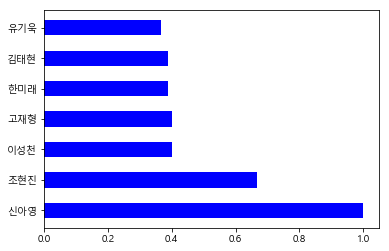

In [386]:
def myBar(data, lab):
    # 시각화
    pos = range(len(data))
    plt.barh(pos, data, height=0.5, color='b')  # 가로
    plt.yticks(pos,lab)
    plt.show()
    
# 튜플 분리
li = top_match(df,'조준형',7)
scoreList = []
nameList = []

for i in li :
    scoreList.append(i[0])
    nameList.append(i[1])
    
print(scoreList)
print(nameList)

myBar(scoreList,nameList)

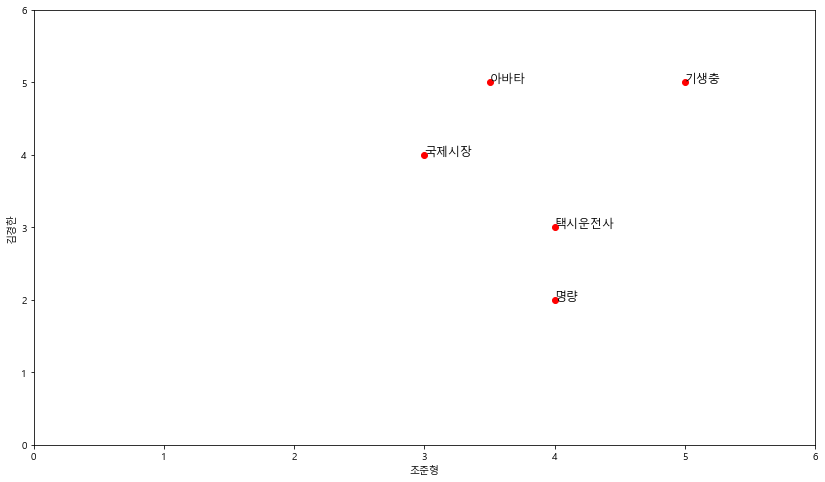

In [387]:
def scoreGraph(data, n1, n2):
    # 스캐터플롯 출력
    plt.figure(figsize=(14,8))
    li1 = []
    li2 = []
    for i in dict(data[n1]) :
        if (data[n1][i] != 'nan') & (data[n2][i] != 'nan'):
            li1.append(data[n1][i])
            li2.append(data[n2][i])
            plt.text(data[n1][i], data[n2][i], i, fontsize=12)
            
    plt.plot(li1, li2, 'ro')
    plt.xlabel(n1)
    plt.ylabel(n2)
    plt.axis([0,6,0,6])
    plt.show()
    
scoreGraph(df, '조준형','김경한')

In [305]:
df.columns

Index(['고재형', '김건우', '박경호', '박찬', '김경아', '정서영', '정한음', '오종민', '차유화', '이성천',
       '이은성', '김나연', '조준형', '김태현', '한미래', '조현진', '유기욱', '김경한', '신아영', '엄다연'],
      dtype='object')

In [366]:
dict(df['조현진'])

{'명량': 'nan',
 '국제시장': 'nan',
 '아바타': 4.0,
 '택시운전사': 'nan',
 '부산행': 'nan',
 '변호인': 'nan',
 '겨울왕국': 4.0,
 '기생충': 'nan'}

In [382]:
def sim_pearson(data, n1, n2):
    # 구현
    sumX = 0
    sumY = 0
    sumSqX = 0
    sumSqY = 0
    sumXY = 0
    cnt = 0
    
    for i in dict(data[n1]) :
        if (data[n1][i] != 'nan') & (data[n2][i] != 'nan'):
            sumX += data[n1][i]
            sumY += data[n2][i]
            sumSqX += pow(data[n1][i], 2)
            sumSqY += pow(data[n2][i], 2)
            sumXY += (data[n1][i] *  data[n2][i])
            cnt += 1
    
    return  ((sumXY-((sumX*sumY)/cnt))+0.001) / (sqrt((sumSqX-(pow(sumX,2)/cnt))*(sumSqY-(pow(sumY,2)/cnt)))+0.001)

sim_pearson(df,'조준형','김경한')

0.10364928395959662

In [384]:
df.columns

Index(['고재형', '김건우', '박경호', '박찬', '김경아', '정서영', '정한음', '오종민', '차유화', '이성천',
       '이은성', '김나연', '조준형', '김태현', '한미래', '조현진', '유기욱', '김경한', '신아영', '엄다연'],
      dtype='object')

In [403]:
# 전체 관객들에 대한 상관계수

def top_match(data, name, rank=3, simf = sim_pearson):
    
    simList = []
    
    for i in data.columns:
        if i != name:
            simList.append((simf(data, name, i), i ))
            
    simList.sort()    # 오름차순정렬
    simList.reverse() # 내림차순으로 변경
    
    return simList[:rank]

# df에서 와 공통으로 본 영화 중에서 상관계수가 가장 높은 5명을 추출
print(top_match(df,'유기욱',5))

[(1.0, '조현진'), (1.0, '이성천'), (0.9604926547463165, '이은성'), (0.7784267512076357, '한미래'), (0.6228008791193596, '김경한')]


In [379]:
def recommendation(data, person, simf=sim_pearson):
    res = top_match(data, person, len(data))
    # print(res)
    
    simSum = 0
    score_dict = {}  # 예상평점의 총합을 저장하기위한 dict
    sim_dict = {}    # 유사도의 총합을 저장하기 위한 dict
    
    myList = []
    
    for sim, name in res:
        if sim < 0 : continue
        for movie in dict(data[name]):
            if (data[name][movie] != 'nan') & (data[person][movie] == 'nan'):
                simSum += sim * data[name][movie]
                score_dict.setdefault(movie, 0 )
                score_dict[movie] += simSum
                
                sim_dict.setdefault(movie, 0 )
                sim_dict[movie] += sim
            simSum = 0
    
    for key in score_dict:
        score_dict[key] = score_dict[key] / sim_dict[key]
        myList.append((score_dict[key], key))
    myList.sort()
    myList.reverse()
    
    print(myList)
    return

recommendation(df,'조준형')
# 소녀시대가 안 본 영화중에서 예상 평점이 가장 높은 영화 3편 출력

ZeroDivisionError: division by zero